# Calculating non-covalent interaction

Calculating energy from non-covalent bonds is critical to evaluate energy of overall system. 
In this class, we will write a code that calculate potential energy landsacpe around a 2D molecule. 


Text(0.5, 0, 'x coord')

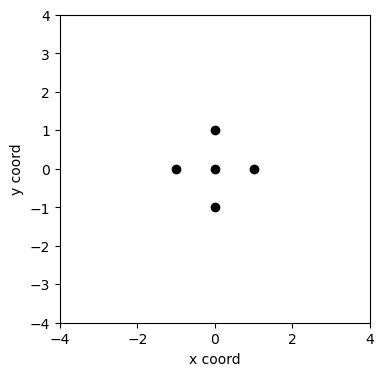

In [41]:
## Setting 

import numpy as np
import matplotlib.pyplot as plt

coords = [[0,0],[1,0],[-1,0],[0,1],[0,-1]]
coords = np.array(coords)

plt.figure(figsize=(4,4))
plt.plot(coords[:,0],coords[:,1],'o',color='black')

plt.ylim(-4,4)
plt.xlim(-4,4)
plt.ylabel('y coord')
plt.xlabel('x coord')


In [33]:
import math

def calDist(v1,v2):
    if len(v1) == 3:
        dist = math.sqrt((v2[0]-v1[0])**2 + (v2[1]-v1[1])**2 + (v2[2]-v1[2])**2)
    elif len(v1) == 2:
        dist = math.sqrt((v2[0]-v1[0])**2 + (v2[1]-v1[1])**2)
    return dist


def LJ(v1, v2, epsilon, sigma):
    r = calDist(v1,v2)
    E = 4*epsilon*((sigma/r)**12 - (sigma/r)**6)
    return E

grid_num = 100
x_grid = np.linspace(-4,4,grid_num)
y_grid = np.linspace(-4,4,grid_num)

e_LJ = 1.0
s_LJ = 1.0

grid_E_LJ = []

for x in x_grid:
    for y in y_grid:
        grid_coord = [x,y]
        E_1 = LJ(grid_coord, coords[0], e_LJ, s_LJ)
        E_2 = LJ(grid_coord, coords[1], e_LJ, s_LJ)
        E_3 = LJ(grid_coord, coords[2], e_LJ, s_LJ)
        E_4 = LJ(grid_coord, coords[3], e_LJ, s_LJ)
        E_5 = LJ(grid_coord, coords[4], e_LJ, s_LJ)
        E_total = E_1 + E_2 + E_3 + E_4 + E_5
        grid_E_LJ.append([x,y,E_total])

grid_E_LJ = np.array(grid_E_LJ)
print(grid_E_LJ[:3]) # Check first three lines

## Format of grid_E_LJ:
## [x1, y1, E1],
## [x1, y2, E1],
## [x1, y3, E1], ...

grid_E_LJ_matrix = []
for i in range(grid_num):
    grid_E_LJ_matrix.append(grid_E_LJ[i*grid_num:(i+1)*grid_num][:,2]) 
grid_E_LJ_matrix = np.array(grid_E_LJ_matrix)

print(grid_E_LJ_matrix[:3]) # Check first three lines

print("Maximum LJ value: ", np.max(grid_E_LJ_matrix))
print("Minimum LJ value: ", np.min(grid_E_LJ_matrix))


[[-4.00000000e+00 -4.00000000e+00 -7.50107061e-04]
 [-4.00000000e+00 -3.91919192e+00 -8.00058735e-04]
 [-4.00000000e+00 -3.83838384e+00 -8.53404639e-04]]
[[-0.00075011 -0.00080006 -0.0008534  -0.00091036 -0.00097115 -0.00103602
  -0.00110521 -0.00117898 -0.00125759 -0.00134132 -0.00143046 -0.00152528
  -0.0016261  -0.0017332  -0.00184688 -0.00196744 -0.00209517 -0.00223034
  -0.00237322 -0.00252406 -0.00268306 -0.0028504  -0.00302621 -0.00321058
  -0.0034035  -0.0036049  -0.00381461 -0.00403236 -0.00425775 -0.00449022
  -0.00472908 -0.00497347 -0.00522232 -0.0054744  -0.00572826 -0.00598226
  -0.00623456 -0.00648313 -0.0067258  -0.00696023 -0.00718402 -0.00739467
  -0.00758971 -0.00776671 -0.00792335 -0.00805751 -0.00816729 -0.00825109
  -0.00830767 -0.00833618 -0.00833618 -0.00830767 -0.00825109 -0.00816729
  -0.00805751 -0.00792335 -0.00776671 -0.00758971 -0.00739467 -0.00718402
  -0.00696023 -0.0067258  -0.00648313 -0.00623456 -0.00598226 -0.00572826
  -0.0054744  -0.00522232 -0.004

Text(0.5, 0, 'x coord')

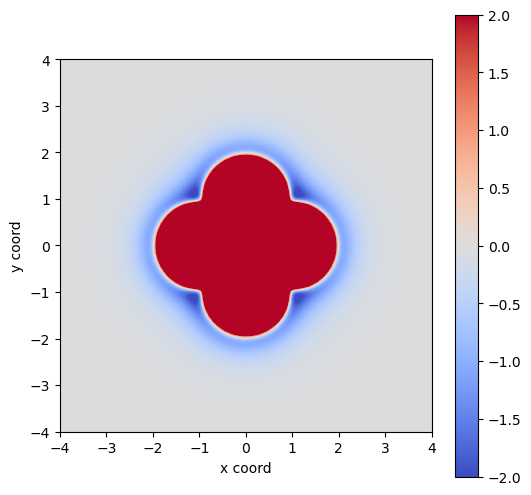

In [39]:
plt.figure(num=2,figsize=(6,6))

plt.imshow(grid_E_LJ_matrix, interpolation='gaussian',extent=(x_grid[0],x_grid[-1],y_grid[0],y_grid[-1]), origin='lower',
          vmin=-2, vmax=2, cmap='coolwarm')

cbar = plt.colorbar()

plt.ylabel("y coord")
plt.xlabel("x coord")